<a href="https://colab.research.google.com/github/umamkhan124/wildfire_Forestfire/blob/main/Umam_wildfire_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving archive (3).zip to archive (3).zip


In [ ]:
import os
print(os.listdir())

['.config', 'archive (3).zip', 'sample_data']


In [ ]:
import zipfile
import os

with zipfile.ZipFile("archive (3).zip", "r") as zip_ref:
    zip_ref.extractall(".")

print(os.listdir())


['.config', 'archive (3).zip', 'FPA_FOD_20170508.sqlite', 'sample_data']


In [ ]:
import zipfile

with zipfile.ZipFile("archive (3).zip", "r") as zip_ref:

    csv_files = [f for f in zip_ref.namelist() if f.endswith(".csv")]

    if csv_files:
        print("Extracting CSV files:", csv_files)
        for csv in csv_files:
            zip_ref.extract(csv, ".")
    else:
        print("No CSV files found in the archive.")


No CSV files found in the archive.


In [ ]:
import sqlite3
import pandas as pd


conn = sqlite3.connect("FPA_FOD_20170508.sqlite")


tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:\n", tables)


conn.close()


Tables in the database:
                                   name
0                      spatial_ref_sys
1                   spatialite_history
2                      sqlite_sequence
3                     geometry_columns
4                  spatial_ref_sys_aux
5               views_geometry_columns
6               virts_geometry_columns
7          geometry_columns_statistics
8    views_geometry_columns_statistics
9    virts_geometry_columns_statistics
10        geometry_columns_field_infos
11  views_geometry_columns_field_infos
12  virts_geometry_columns_field_infos
13               geometry_columns_time
14               geometry_columns_auth
15         views_geometry_columns_auth
16         virts_geometry_columns_auth
17                  sql_statements_log
18                        SpatialIndex
19                ElementaryGeometries
20                                 KNN
21                               Fires
22                     idx_Fires_Shape
23                idx_Fires_Shape_node


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")

# Load the Fires table
df = pd.read_sql_query("SELECT * FROM Fires", conn)

# Export to CSV
df.to_csv("Fires_export.csv", index=False)

# Optional: Preview first few rows
print(df.head())

# Close the connection
conn.close()


   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [ ]:
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")

# Now run the query
df = pd.read_sql_query("SELECT * FROM Fires", conn)



In [ ]:
df.head()



,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [13]:
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")

In [14]:
df_full = pd.read_sql_query("SELECT * FROM Fires;", conn)
df_full.to_csv("FPA_FOD_20170508.csv", index=False)

conn.close()

In [18]:
import pandas as pd

df = pd.read_csv("FPA_FOD_20170508.csv")
df.head()


/tmp/ipython-input-2701314597.py:3: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FPA_FOD_20170508.csv")


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [19]:
df = pd.read_csv("FPA_FOD_20170508.csv", dtype={
    'FIRE_SIZE': float,
    'STATE': str,
    'FIRE_YEAR': int,
})


/tmp/ipython-input-4223357325.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FPA_FOD_20170508.csv", dtype={


In [20]:

df['FIRE_SIZE'] = pd.to_numeric(df['FIRE_SIZE'], errors='coerce')

df['FIRE_SIZE'] = df['FIRE_SIZE'].fillna(df['FIRE_SIZE'].median())


In [21]:

df = df.drop_duplicates()

df.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

df['fire_year'] = pd.to_numeric(df['fire_year'], errors='coerce')
df['fire_size'] = pd.to_numeric(df['fire_size'], errors='coerce')
df['state'] = df['state'].astype(str)

df['fire_size'] = df['fire_size'].fillna(df['fire_size'].median())

df = df.dropna(subset=['state','fire_year'])


In [22]:

df.info()

df.describe()

print(df.isnull().sum())

print(df['state'].nunique())
print(df['state'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   objectid                    int64  
 1   fod_id                      int64  
 2   fpa_id                      object 
 3   source_system_type          object 
 4   source_system               object 
 5   nwcg_reporting_agency       object 
 6   nwcg_reporting_unit_id      object 
 7   nwcg_reporting_unit_name    object 
 8   source_reporting_unit       object 
 9   source_reporting_unit_name  object 
 10  local_fire_report_id        object 
 11  local_incident_id           object 
 12  fire_code                   object 
 13  fire_name                   object 
 14  ics_209_incident_number     object 
 15  ics_209_name                object 
 16  mtbs_id                     object 
 17  mtbs_fire_name              object 
 18  complex_name                object 
 19  fire_year            

In [23]:

wildfires_per_state = df.groupby('state')['fire_size'].sum().reset_index()
wildfires_per_state.rename(columns={'fire_size':'total_wildfires'}, inplace=True)

wildfires_per_year = df.groupby('fire_year')['fire_size'].sum().reset_index()


/tmp/ipython-input-2142767254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_wildfires', data=top_states, palette='Reds_r')


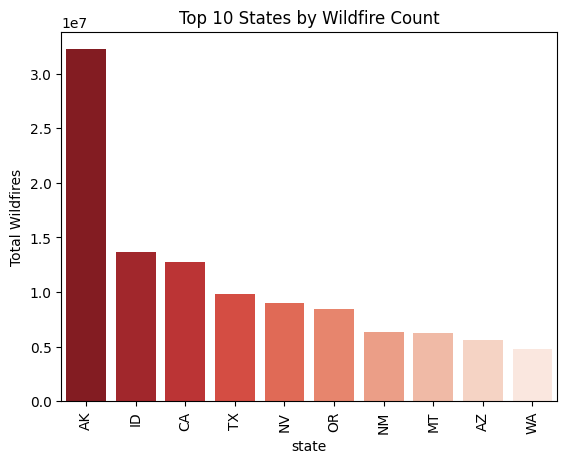

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

top_states = wildfires_per_state.sort_values(by='total_wildfires', ascending=False).head(10)
sns.barplot(x='state', y='total_wildfires', data=top_states, palette='Reds_r')
plt.xticks(rotation=90)
plt.ylabel("Total Wildfires")
plt.title("Top 10 States by Wildfire Count")
plt.show()


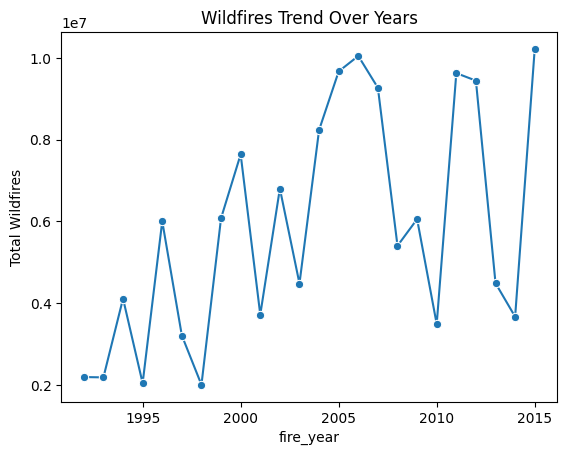

In [25]:
sns.lineplot(x='fire_year', y='fire_size', data=wildfires_per_year, marker='o')
plt.ylabel("Total Wildfires")
plt.title("Wildfires Trend Over Years")
plt.show()


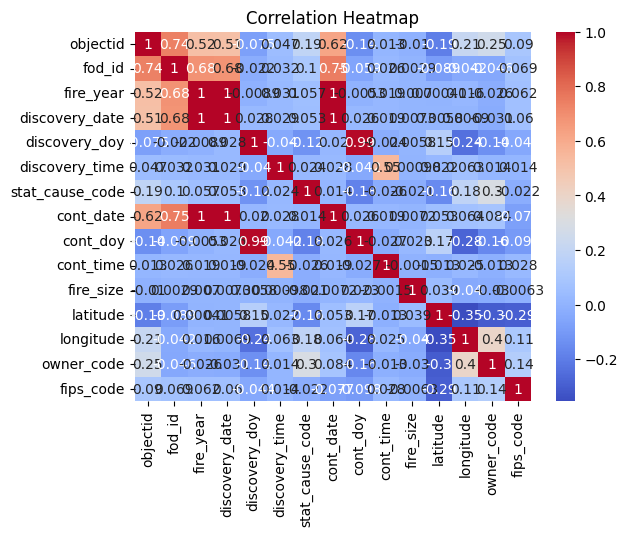

In [26]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [28]:
from google.colab import files
uploaded_geo = files.upload()

Saving india_state.geojson to india_state (1).geojson


In [29]:
import os
os.listdir()

['.config',
 'FPA_FOD_20170508.csv',
 'Fires_export.csv',
 'india_state.geojson',
 'archive (3).zip',
 'india_state (1).geojson',
 'FPA_FOD_20170508.sqlite',
 'sample_data']

In [30]:
import geopandas as gpd

india = gpd.read_file("india_state.geojson")
india.head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.3831, 96.1638 29.37668, ..."
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.5373, 89.87118 25...."
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [34]:
import geopandas as gpd

india = gpd.read_file("india_state.geojson")




In [35]:

wildfires_per_state.rename(columns={'state':'NAME_1'}, inplace=True)

merged = india.merge(wildfires_per_state, on='NAME_1', how='left')


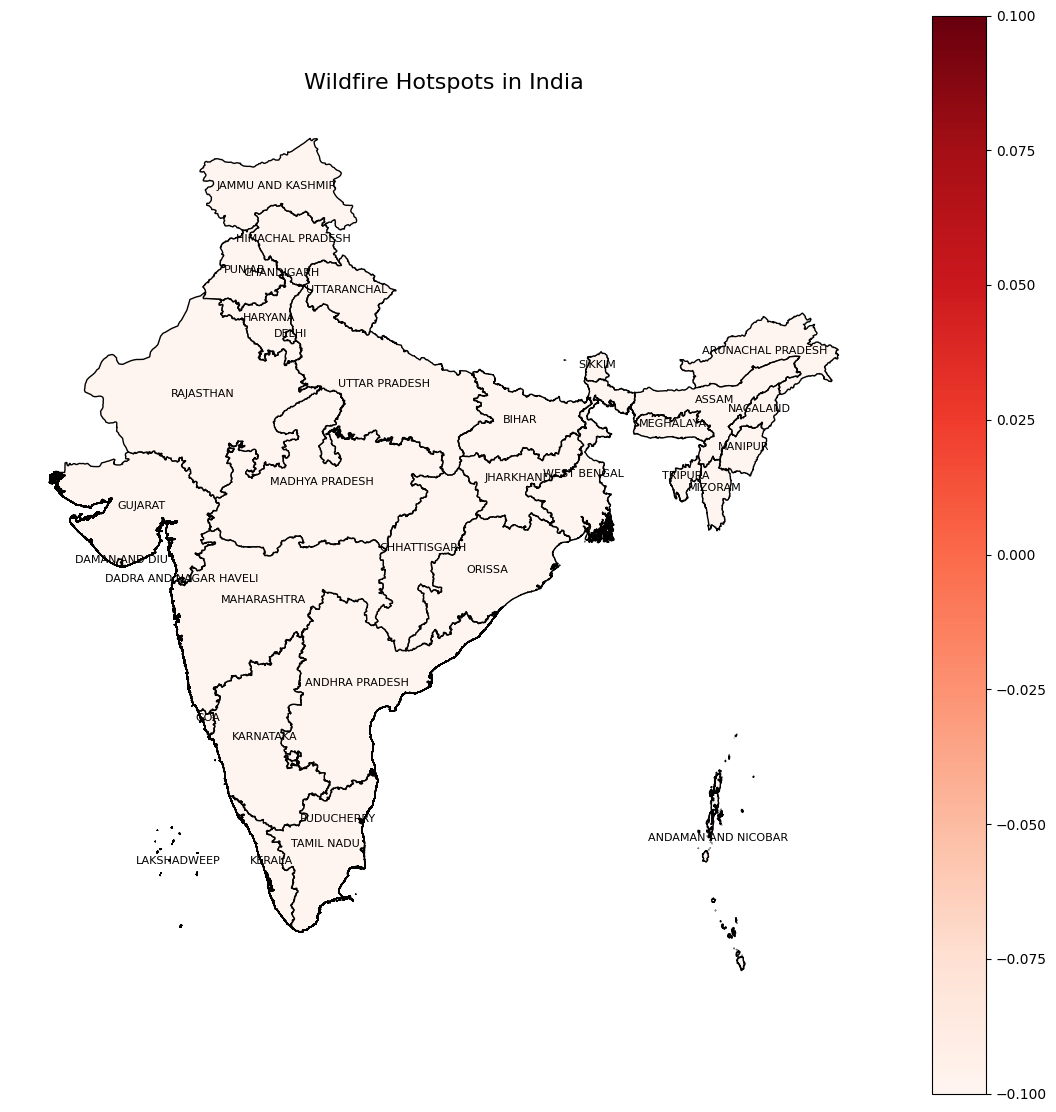

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


india = gpd.read_file("india_state.geojson")

df = pd.read_csv("FPA_FOD_20170508.csv", low_memory=False)
wildfires_per_state = df.groupby('STATE')['FIRE_SIZE'].sum().reset_index()
wildfires_per_state.rename(columns={'STATE':'NAME_1', 'FIRE_SIZE':'total_wildfires'}, inplace=True)


india['NAME_1'] = india['NAME_1'].str.strip().str.upper()
wildfires_per_state['NAME_1'] = wildfires_per_state['NAME_1'].str.strip().str.upper()


merged = india.merge(wildfires_per_state, on='NAME_1', how='left')
merged['total_wildfires'] = merged['total_wildfires'].fillna(0)


fig, ax = plt.subplots(figsize=(14,14))
merged.plot(column='total_wildfires', cmap='Reds', legend=True, edgecolor='black', ax=ax)
plt.title("Wildfire Hotspots in India", fontsize=16)


for idx, row in merged.iterrows():
    plt.annotate(text=row['NAME_1'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.axis('off')
plt.show()
